<a href="https://colab.research.google.com/github/BonganiSomba/Machine_Learning_For_Supply_Chain/blob/main/PredictionOfAnswer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importing the Module and Data

In [1]:
####importing modules  
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#!pip install -U imbalanced-learn 
#!pip install -U delayed

import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
####### importing data


df = pd.read_excel("TBD of Collaborated_Report_1_Page 1_Table.xlsx")
df.head()


,Date,Language,User,Question,Answer,Right_Or_Wrong,new_score,last_core
0,"27 Sept 2021, 06:50:49",GERMAN,kell.kvist@gmail.com,Er liest,ER LIEST,True,212.0,211.0
1,"27 Sept 2021, 06:49:55",ENGLISH,kell.kvist@gmail.com,I feel sleepy,I FEEL SLEEPY,True,138.0,137.0
2,"27 Sept 2021, 06:48:13",DANISH,kell.kvist@gmail.com,De føler varmen,DE FØLER VARMEN,True,146.0,145.0
3,"27 Sept 2021, 06:35:50",ENGLISH,kell.kvist@gmail.com,No problem,NO PROBLEM,True,137.0,136.0
4,"27 Sept 2021, 06:35:41",ENGLISH,kell.kvist@gmail.com,No problem,NO PROBLE,False,NaN,NaN


###Data Exploration 

We will explore our data and to see what types of changes we can perfom in our dataset 

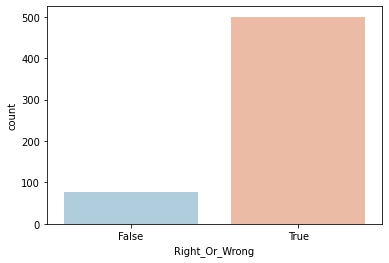

In [3]:
#This is representation of True and False, as we can see the Data is not well balanced. Which we should keep in mind for later 


sns.countplot(x='Right_Or_Wrong',data=df, palette='RdBu_r')

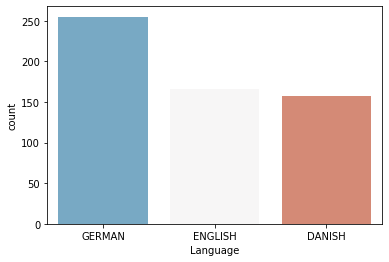

In [4]:
# this is a represtation of different langueges we have on our dataset. 
sns.countplot(x='Language',data=df, palette='RdBu_r')

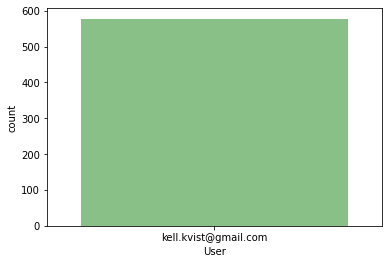

In [5]:
##### this we try to check how many users took the task, so far there's only one users.
sns.countplot(x='User',data=df,palette='Accent')

##Data pre Processing

We will do data cleaning sincce we working with NLP project we will convert all the words into numerical methods


In [6]:
#### checking the number of our missing values in our dataset
### we won't need to remove 
df.isnull().sum()

Date               0
Language           0
User               0
Question           0
Answer             0
Right_Or_Wrong     0
new_score         78
last_core         78
dtype: int64

In [ ]:
#df['new_score_null'] = np.where(df['new_score'].isnull(),1,0)
#df['last_core_null'] = np.where(df['last_core'].isnull(),1,0)
#df['last_core_null'].mean() ### we will like to check the % of na in our dataset 

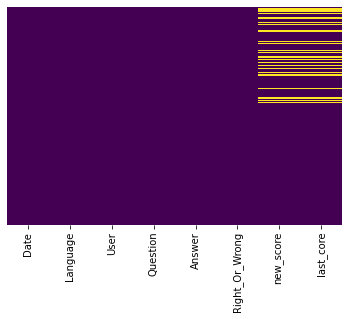

In [ ]:
##### plot the graph that will check for any missing values

sns.heatmap(df.isnull(),yticklabels=False, cbar= False,cmap= 'viridis')

##removing of na
Since we now replace NA with some numerical values, we will plot the graphs to see if the new values did not affect our initial values. 

In [ ]:
##### since our dataset have NUll we will want to work and solve this before we pass Data into the model
## the approuch we will use is interpolation by use of numerical methods. 


new_data = df.interpolate(method='quadratic')
new_data['new_score.fix'] = new_data['new_score']
new_data['last_core.fix'] = new_data['last_core']
new_data.head(7)

,Date,Language,User,Question,Answer,Right_Or_Wrong,new_score,last_core,new_score.fix,last_core.fix
0,"27 Sept 2021, 06:50:49",GERMAN,kell.kvist@gmail.com,Er liest,ER LIEST,True,212.000000,211.000000,212.000000,211.000000
1,"27 Sept 2021, 06:49:55",ENGLISH,kell.kvist@gmail.com,I feel sleepy,I FEEL SLEEPY,True,138.000000,137.000000,138.000000,137.000000
2,"27 Sept 2021, 06:48:13",DANISH,kell.kvist@gmail.com,De føler varmen,DE FØLER VARMEN,True,146.000000,145.000000,146.000000,145.000000
3,"27 Sept 2021, 06:35:50",ENGLISH,kell.kvist@gmail.com,No problem,NO PROBLEM,True,137.000000,136.000000,137.000000,136.000000
4,"27 Sept 2021, 06:35:41",ENGLISH,kell.kvist@gmail.com,No problem,NO PROBLE,False,133.313480,132.313480,133.313480,132.313480
5,"27 Sept 2021, 06:35:22",ENGLISH,kell.kvist@gmail.com,No problem,NO PRIBLEM,False,139.833946,138.833946,139.833946,138.833946
6,"27 Sept 2021, 06:04:39",DANISH,kell.kvist@gmail.com,Mange problemer,MANGE PROBLEMER,True,146.000000,145.000000,146.000000,145.000000


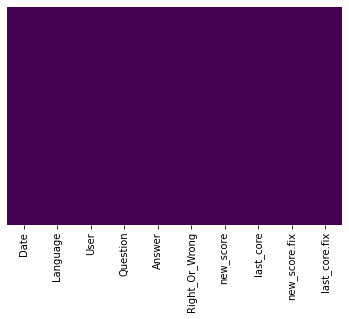

In [ ]:
##### plot the graph that will check for any missing values

sns.heatmap(new_data.isnull(),yticklabels=False, cbar= False,cmap= 'viridis')

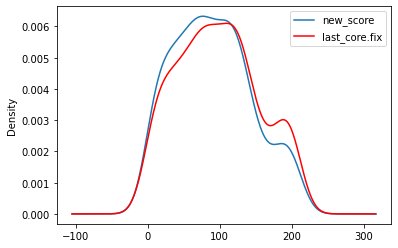

In [ ]:
##### new_score vs new_score.fix
fig = plt.figure()
ax = fig.add_subplot(111)
df['new_score'].plot(kind='kde', ax=ax)
new_data['last_core.fix'].plot(kind='kde', ax=ax, color='red')
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels, loc='best')

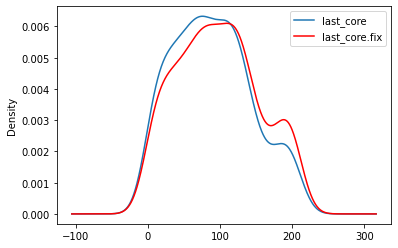

In [ ]:
#### last_score vs last_score.fix
fig = plt.figure()
ax = fig.add_subplot(111)
df['last_core'].plot(kind='kde', ax=ax)
new_data['last_core.fix'].plot(kind='kde', ax=ax, color='red')
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels, loc='best')

##Data Exploration 

In [ ]:
### We will create a numerical values for Language so it can be easy to work with 
## note thay the sklearn will asssiing the numerical values to each language 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
dfle = new_data
dfle['Language'] = le.fit_transform(dfle['Language'])
new_data.head(2)

,Date,Language,User,Question,Answer,Right_Or_Wrong,new_score,last_core,new_score.fix,last_core.fix
0,"27 Sept 2021, 06:50:49",2,kell.kvist@gmail.com,Er liest,ER LIEST,True,212.0,211.0,212.0,211.0
1,"27 Sept 2021, 06:49:55",1,kell.kvist@gmail.com,I feel sleepy,I FEEL SLEEPY,True,138.0,137.0,138.0,137.0


In [ ]:
##### we will only keep the column that will be used the model. 


new_data.drop(['Date','User','Question','Answer','new_score','last_core'], inplace= True, axis= 1)


In [ ]:
#### converting True or False into 1 and 0
new_data['Right_Or_Wrong'] = new_data['Right_Or_Wrong'].astype(int)
new_data.head(2)

,Language,Right_Or_Wrong,new_score.fix,last_core.fix
0,2,1,212.0,211.0
1,1,1,138.0,137.0


Now our Data have no null values.

1.   Since we replaced na values with some numerical values, we will test if this did not affect our entire dataset
2.   if the new values did not affect our dataset we will use the new data set for our model 



##Handling an imblance dataset

We could see from above graph that the data is imbalanced, so we will fix this before we could build our model. 

In [ ]:
new_data.Language.value_counts()

2    255
1    166
0    157
Name: Language, dtype: int64

In [ ]:
new_data.Right_Or_Wrong.value_counts()

1    500
0     78
Name: Right_Or_Wrong, dtype: int64

### Data Scalling  

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import  preprocessing
scaler = preprocessing.MinMaxScaler()
new_data[['new_score.fix','last_core.fix']] =  scaler.fit_transform(new_data[['new_score.fix','last_core.fix']])

##Model Fitting

We will use the methods called SMOTE over sampling to handle our imbalanced data


In [ ]:
pip install -U delayed


     |████████████████████████████████| 72 kB 431 kB/s 
     |████████████████████████████████| 85 kB 3.8 MB/s 


In [ ]:
#from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
X = new_data.drop('Right_Or_Wrong', axis=1)
y = new_data['Right_Or_Wrong']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

print(f'''% Positive class in Train = {np.round(y_train.value_counts(normalize=True)[1] * 100, 2)}
% Positive class in Test  = {np.round(y_test.value_counts(normalize=True)[1] * 100, 2)}''')


% Positive class in Train = 86.61
% Positive class in Test  = 86.21


In [ ]:
##### building a random forest model

Accuracy = 0.81
Recall = 0.86



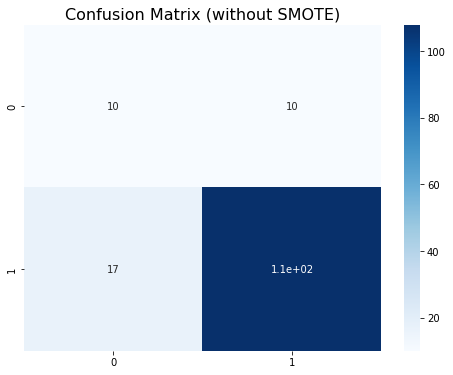

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

# Train
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

# Evaluate
print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (without SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

### We will use a smote methods 

Although our model is already 81% we can not use it since our data is unbalnced thats why we will use the smote model to get the accurate results

In [ ]:
#from imblearn.over_sampling import smote
import imblearn
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 42)

X_sm, y_sm = sm.fit_resample(X,y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
#y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (578, 3)
Shape of X after SMOTE: (1000, 3)

Balance of positive and negative classes (%):


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Accuracy = 0.76
Recall = 0.72



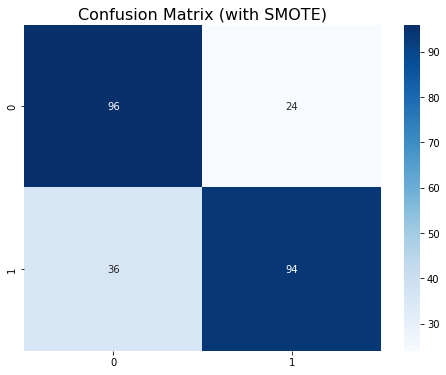

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sm, y_sm, test_size=0.25, random_state=42
)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy = 0.79
Recall = 0.68



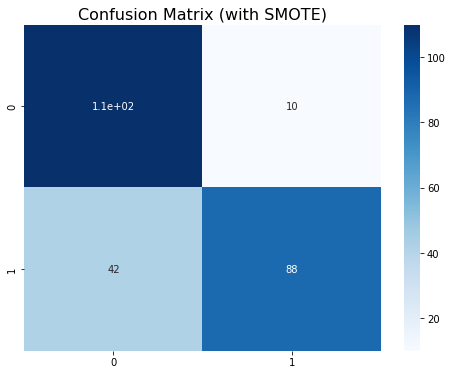

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sm, y_sm, test_size=0.25, random_state=42
)

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');


Accuracy = 0.74
Recall = 0.66



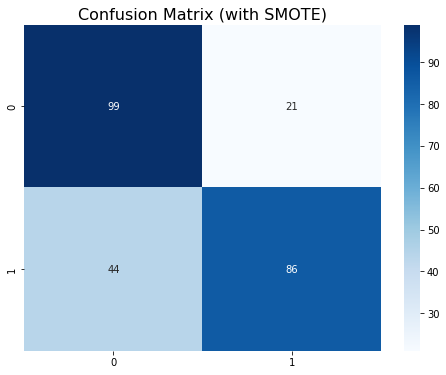

In [ ]:
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(
    X_sm, y_sm, test_size=0.25, random_state=42
)

model = GaussianNB()
model.fit(X_train, y_train)
preds = model.predict(X_test)

print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');


In [ ]:
len(X_train.columns)

3

In [ ]:
###### We will use our last option which is artificial neural network 

import tensorflow as tf
from tensorflow import keras 

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    X_sm, y_sm, test_size=0.25, random_state=42
)

clf = SVC(kernel='linear')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.756


Accuracy = 0.84
Recall = 0.40



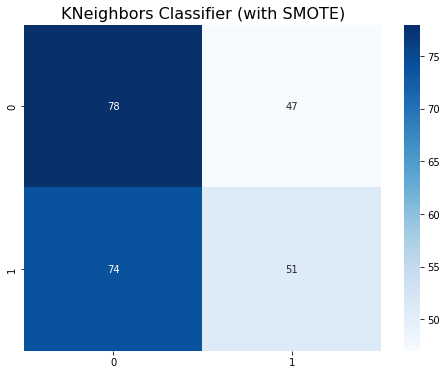

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics
import pickle

X_train, X_test, y_train, y_test = train_test_split(
    X_sm, y_sm, test_size=0.25
)

knn= KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred= knn.predict(X_test)
metrics.accuracy_score(y_test,y_pred)


print(f'Accuracy = {metrics.accuracy_score(y_test,y_pred):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
plt.figure(figsize=(8, 6))
plt.title('KNeighbors Classifier (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

pickle.dump(knn, open("KNeighborsClassifierModel.pkl","wb"))

In [ ]:
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(
    X_sm, y_sm, test_size=0.25, random_state=42
)

classifier = GaussianNB()
classifier.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
print(ac)

0.812


###We will create an app using fastAPA

In [ ]:
%%writefile model.py

from pydantic import BaseModel, conlist
from typing import List

class googlemodel(BaseModel):
  data:List[conlist(float,min_items=3,max_items=3)]

Writing model.py


In [ ]:
import pickle
import logging
from fastapi import FastAPI


app = FastAPI(tittle="Google ML as API", description="Using FastAPI on ColabCode", version="1.0" )


# # Initialize logging
# my_logger = logging.getLogger()
# my_logger.setLevel(logging.DEBUG)
# logging.basicConfig(level=logging.DEBUG, filename='logs.log')

model = None

@app.on_event("startup")
def load_model():
    global model
    model = pickle.load(open("KNeighborsClassifierModel.pkl", "rb"))

@app.post("/api", tags=["prediction"])
async def get_predictions(y_test: preds):
    try:
        data = dict(estimate)['data']
        print(data)
        iris_types = {
            0: 'email',
            1: 'Langu',
            2: 'Question' ### prop of right or wrong
        }
        prediction = list(map(lambda x: iris_types[x], model.predict(data).tolist()))
        log_proba = model.predict_log_proba(data).tolist()
        return {"prediction": prediction, "log_proba": log_proba}
    except:
        my_logger.error("Something went wrong!")
        return {"prediction": "error"}

NameError: ignored